*Warning*: Distribution/sharing of this notebook and other lab notebooks on the internet and other sources is strictly prohibited. You should not provide this notebook to anyone else. you should just use it for the purpose of this assessment only.

You should attempt and submit your work. you can refer to sources/APIs to complete this taks. Copying from each other even a part or so is strictly prohibited and may result in serious action.


# Predictive Analytics for Trending Videos


This assessmet will enable you achieve essential experience of machine learning using sklearn and scalable approach to machine learning based on park ML!

The focus of this assessment is to explore what makes videos popular on various platforms, e.g., Netflix and YouTube. The assessment will focus on YouTube 's data.

**PLEASE NOTE** There can be multiple solutions possible for this assessment. various students will end up implementing different solutions. Therefore, there is not a single solution to fit all students.

### Required Libraries
Setup the libraries using the following cells. You should select Java 8 when prompted.

In [1]:
# if restart of runtime is successful, the execution of this cell should
# prints True

import pandas as pd
print(pd.__version__)

2.0.2


In [2]:
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
from matplotlib import pyplot
import seaborn
import random
pd.options.mode.chained_assignment = None

Import your dataset using the following cells for the Youtube videos

In [3]:

#from google.colab import files
#uploaded = files.upload()

In [11]:
from google.colab import drive

drive.mount('/content/gdrive')
!unzip /content/gdrive/MyDrive/predictive/t_project_2/youtube_data.zip

Mounted at /content/gdrive
Archive:  /content/gdrive/MyDrive/predictive/t_project_2/youtube_data.zip
   creating: youtube_data/
  inflating: youtube_data/IN_category_id.json  
   creating: __MACOSX/
   creating: __MACOSX/youtube_data/
  inflating: __MACOSX/youtube_data/._IN_category_id.json  
  inflating: youtube_data/.DS_Store  
  inflating: __MACOSX/youtube_data/._.DS_Store  
  inflating: youtube_data/FR_category_id.json  
  inflating: __MACOSX/youtube_data/._FR_category_id.json  
  inflating: youtube_data/INvideos.csv  
  inflating: __MACOSX/youtube_data/._INvideos.csv  
  inflating: youtube_data/CAvideos.csv  
  inflating: __MACOSX/youtube_data/._CAvideos.csv  
  inflating: youtube_data/FRvideos.csv  
  inflating: __MACOSX/youtube_data/._FRvideos.csv  
  inflating: youtube_data/CA_category_id.json  
  inflating: __MACOSX/youtube_data/._CA_category_id.json  
  inflating: youtube_data/US_category_id.json  
  inflating: __MACOSX/youtube_data/._US_category_id.json  
  inflating: youtub

# Section 1. : Machine Learning with Sklearn

## 1.1.1 Data loading and Preprocessing

The dataset consists of a daily record of the top trending YouTube videos.

To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions, e.g., number of views, shares, comments and likes. "Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously viral “[Gangnam Style](https://www.youtube.com/watch?v=9bZkp7q19f0)”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for numerous countries, with up to 200 listed trending videos per day.

Each region’s data is in a separate file. Data includes:

*   Video Title
*   Channel title
*   Publish time
*   Tags
*   Views
*   Likes
*   Dislikes
*   Description
*   Comment count

The data also includes a category\_id field, which varies between regions. To retrieve the categories for a specific video, find it in the associated JSON. One such file is included for each of the five regions in the dataset.

For more information on specific columns in the dataset refer to the column metadata.



#### 1.1.1.1: Combining Multiple CSV's.

There are multiple csv files in the dataset, each corresponding to a specific country. As a first step you need to read them and combine these csv files into a single dataframe. Use 'video_id' as your index.

While combining them, you also need to create a column for "country" and fill it in the final dataframe. The country name can be extracted using the filename itself.

Name your dataframe "combined_data".

In [5]:
os.listdir("youtube_data")

['IN_category_id.json',
 '.DS_Store',
 'FR_category_id.json',
 'INvideos.csv',
 'CAvideos.csv',
 'FRvideos.csv',
 'CA_category_id.json',
 'US_category_id.json',
 'USvideos.csv']

In [7]:
files = [file for file in os.listdir("youtube_data")]
print(files)

['IN_category_id.json', '.DS_Store', 'FR_category_id.json', 'INvideos.csv', 'CAvideos.csv', 'FRvideos.csv', 'CA_category_id.json', 'US_category_id.json', 'USvideos.csv']


In [13]:
all_data = list()
for file in files:
    if file.split(".")[1] == "csv":
        frame = pd.read_csv(os.path.join(os.getcwd(), "youtube_data/") + file, index_col=0)
        frame["country"] = file.split("videos.csv")[0]
        all_data.append(frame)
combined_data = pd.concat(all_data)

In [14]:
combined_data.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN
zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN
10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN
N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,IN
kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,IN


# Below cell is to read combined data coming from csv file

In [21]:
# # Import all the csv files
# #files = [i for i in glob.glob('/content/youtube_data/*.csv'.format('csv'))]
# files = [i for i in glob.glob('/content/youtube_data/*.csv'.format('csv'))]
# sorted(files)
# all_dataframes = list()

# # Task: Merge all dataframes to single dataframe "combined_data" and add a 'country' column.
# for csv in files:
#   #all_dataframes.append(pd.read_csv(csv))
#   frame = pd.read_csv(csv,index_col=0)
#   frame['country'] = os.path.basename(csv)
#   all_dataframes.append(frame)

# combined_data = pd.concat(all_dataframes)
# combined_data['country']=combined_data['country'].map(lambda x: x.lstrip('+-').rstrip('videos.csv'))
# combined_data

In [22]:
combined_data.head(2)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN
zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN


#### 1.1.1.2: Map category Id's to categories

Read the category_id.json file and map the category_id's in the dataframe to the category name.

Use json.load to read in the data in the json file as a python dictionary and then map the category id given in the dataframe to category name from the json file. (Hint: the US json is likely the most comprehensive reference)




In [15]:
files

['IN_category_id.json',
 '.DS_Store',
 'FR_category_id.json',
 'INvideos.csv',
 'CAvideos.csv',
 'FRvideos.csv',
 'CA_category_id.json',
 'US_category_id.json',
 'USvideos.csv']

In [36]:
# all_data = list()
id_to_category = {}
for file in files:
    if file.split(".")[1] == "json":
        frame = pd.read_json(os.path.join(os.getcwd(), "youtube_data/") + file)
        for category in frame["items"]:
            id_to_category[category["id"]] = category["snippet"]["title"]

In [37]:
combined_data.category_id = combined_data.category_id.astype(str)
combined_data["category"] = combined_data["category_id"].map(id_to_category)

In [38]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159906 entries, kzwfHumJyYc to ooyjaVdt-jA
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   trending_date           159906 non-null  object
 1   title                   159906 non-null  object
 2   channel_title           159906 non-null  object
 3   category_id             159906 non-null  object
 4   publish_time            159906 non-null  object
 5   tags                    159906 non-null  object
 6   views                   159906 non-null  int64 
 7   likes                   159906 non-null  int64 
 8   dislikes                159906 non-null  int64 
 9   comment_count           159906 non-null  int64 
 10  thumbnail_link          159906 non-null  object
 11  comments_disabled       159906 non-null  bool  
 12  ratings_disabled        159906 non-null  bool  
 13  video_error_or_removed  159906 non-null  bool  
 14  description             15

#### 1.1.1.3: Fix datetime format and remove rows with NA's (1 pt)

The 'publish_time' and 'trending_date' features are not in a unix datetime format, so use pandas to_datetime() to convert it into the right format.

After that is done remove all the rows which have NA's in them.

In [39]:
combined_data['trending_date'] = pd.to_datetime(combined_data["trending_date"],format ="%y.%d.%m")
combined_data['publish_time'] = pd.to_datetime(combined_data["publish_time"],format = "%Y-%m-%dT%H:%M:%S.%fZ")


combined_data.dropna(inplace = True)
combined_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 154567 entries, kzwfHumJyYc to ooyjaVdt-jA
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   trending_date           154567 non-null  datetime64[ns]
 1   title                   154567 non-null  object        
 2   channel_title           154567 non-null  object        
 3   category_id             154567 non-null  object        
 4   publish_time            154567 non-null  datetime64[ns]
 5   tags                    154567 non-null  object        
 6   views                   154567 non-null  int64         
 7   likes                   154567 non-null  int64         
 8   dislikes                154567 non-null  int64         
 9   comment_count           154567 non-null  int64         
 10  thumbnail_link          154567 non-null  object        
 11  comments_disabled       154567 non-null  bool          
 12  ratings_disabled    

In [40]:
# print
print('validate_na',(combined_data.shape))

validate_na (154567, 17)


## 1.2 Exploratory Data Analysis & Feature Engineering


**Exploratory Data Analysis:**
EDA aims to analyze data sets by summarizing its key characteristics assisted by visualizations. EDA communicates insights beyond formal modeling/hypothesis testing with or without statistical model.

**Feature Engineering:**
The primary object of feature engineering is to extract features using domain knowledge. It aims to extract features from raw data using various data mining approaches.

These features are fed to various machine learning classifiers. These features are also called as covariates, predicators, or simply a new column in data frame.

##### 1.2.1: Calculating Mean, standard deviation, min and max.

In this section, we will focus to compute various satistics, i.e., mean, standard deviation, min and max for numerical features in the dataset and then store them into lists, i.e.,  [views, likes, dislikes, comment_count].

means = [views_mean, likes_mean, dislikes_mean, comment_count_mean] and similarly for mins, maxs and stds.

In [41]:
combined_data.describe()

,trending_date,publish_time,views,likes,dislikes,comment_count
count,154567,154567,1.545670e+05,1.545670e+05,1.545670e+05,1.545670e+05
mean,2018-02-27 02:23:21.598012416,2018-02-21 11:58:53.405118976,1.281578e+06,4.096105e+04,2.056138e+03,4.606594e+03
min,2017-11-14 00:00:00,2006-07-23 08:24:11,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2018-01-03 00:00:00,2018-01-01 02:28:48.500000,9.574900e+04,1.321000e+03,8.100000e+01,1.720000e+02
50%,2018-02-26 00:00:00,2018-02-23 17:00:02,3.134280e+05,6.336000e+03,2.980000e+02,7.650000e+02
75%,2018-04-24 00:00:00,2018-04-21 06:22:47,9.473390e+05,2.594050e+04,1.024000e+03,2.726000e+03
max,2018-06-14 00:00:00,2018-06-14 02:25:38,2.252119e+08,5.613827e+06,1.643059e+06,1.228655e+06
std,NaN,NaN,4.605292e+06,1.521490e+05,1.825854e+04,2.327823e+04


In [42]:

maxs = combined_data.describe().iloc[7].values.tolist()
mins = combined_data.describe().iloc[3].values.tolist()
stds = combined_data.describe().iloc[2].values.tolist()
means = combined_data.describe().iloc[1].values.tolist()



In [43]:
# print here
print('check_min_max_mean_std',([maxs, mins, stds, means]))


check_min_max_mean_std [[nan, nan, 4605292.478385794, 152148.95485475138, 18258.541379660703, 23278.225620617904], [Timestamp('2018-01-03 00:00:00'), Timestamp('2018-01-01 02:28:48.500000'), 95749.0, 1321.0, 81.0, 172.0], [Timestamp('2017-11-14 00:00:00'), Timestamp('2006-07-23 08:24:11'), 223.0, 0.0, 0.0, 0.0], [Timestamp('2018-02-27 02:23:21.598012416'), Timestamp('2018-02-21 11:58:53.405118976'), 1281578.03423758, 40961.05191276275, 2056.138490104615, 4606.593742519425]]


#### 1.2.2: Rescaling the features

From the above section, it is clear that the numerical values range is really high.  we can use rescaling to avoid numerical instability problems. We can rescale likes, views, dislikes, and comment_count using log scale (base e). Let us store rescaled features in dataframe as likes_log, views_log, dislikes_log and comment_log.

NOTE- log 0 is not defined, therefore, you should add 1 to each value prior to taking the log.

In [44]:
combined_data['likes_log'] = np.log(1 + combined_data['likes'])
combined_data['views_log'] = np.log(1 + combined_data['views'])
combined_data['dislikes_log'] = np.log(1 + combined_data['dislikes'])
combined_data['comment_log'] = np.log(1 + combined_data['comment_count'])

In [45]:
# Print results
print('check_feature_rescaling',([np.mean(combined_data['likes_log']),np.mean(combined_data['views_log']),np.mean(combined_data['dislikes_log']),
                                         np.mean(combined_data['comment_log'])]))

check_feature_rescaling [8.571590187188637, 12.552679805013259, 5.614484952080614, 6.424543615107988]


#### 1.2.3: Plotting the distribution (2 pt)

Plot the distribution for the newly created log features. They should look like normal distribution curves.

<Axes: ylabel='Density'>

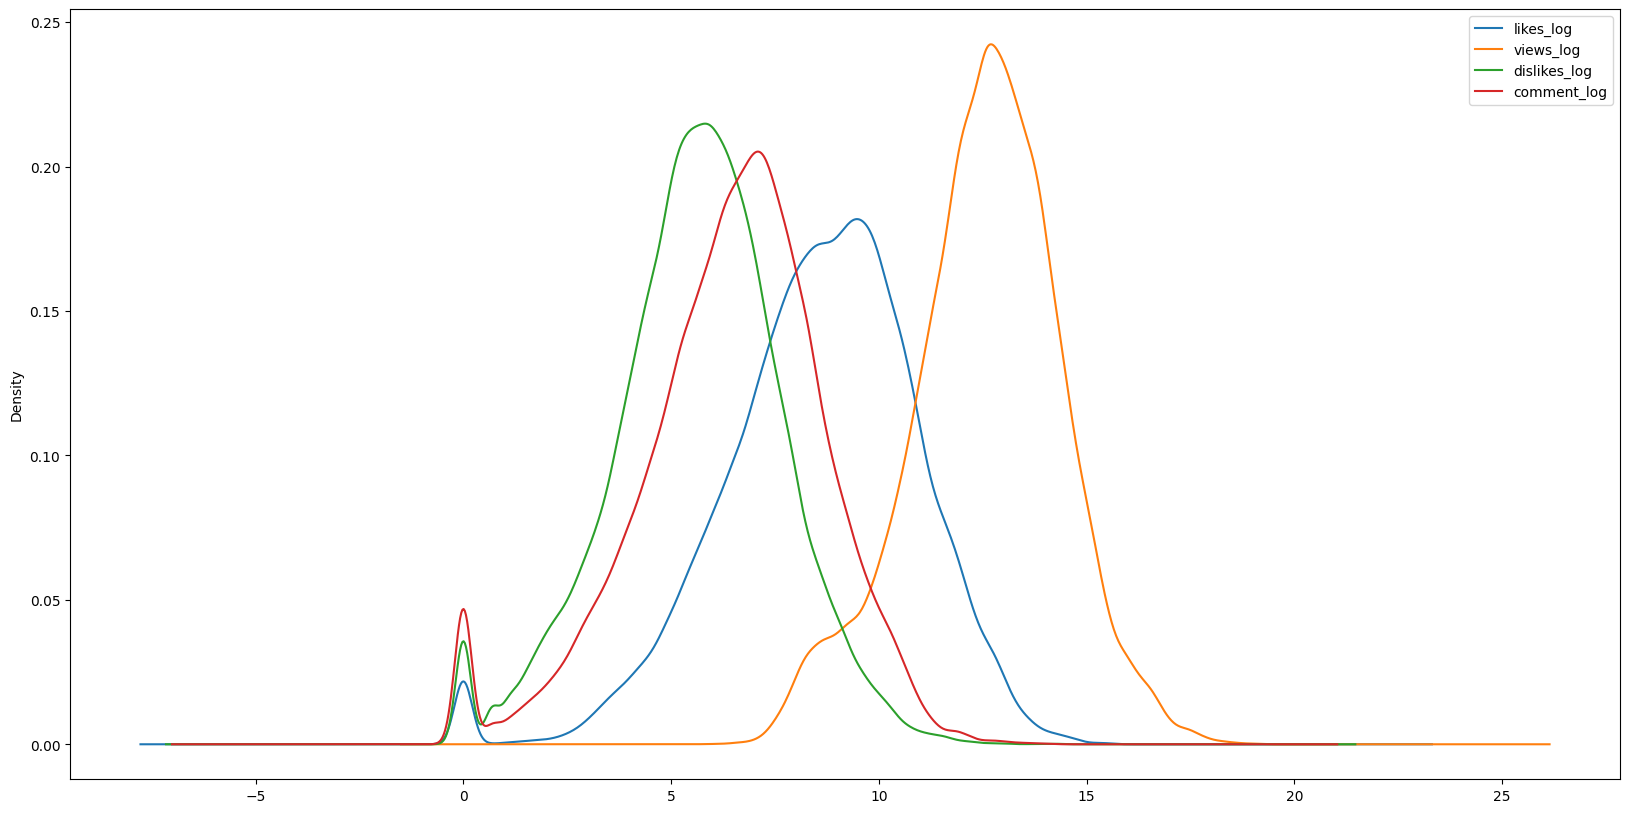

In [46]:
#  plotting the distribution
log_df=combined_data[['likes_log','views_log','dislikes_log','comment_log']]
log_df.plot.kde(figsize=(20,10))
# plot data

#### 1.2.4: Comparing views, likes, dislikes against categories

Let us gain isights into data using various catergories, views, likes and dislikes.

Draw three plots for the following:

1.) How many videos are there for each category?

2.) What is the distribution of views against categories? (Use boxplot and views on log scale)

3.) What is the distribution of dislikes against categories? (Use boxplot and dislikes on log scale)

For extra credit:
You can try to gain more insights into the dataset by drawing interesting plots. Some ideas include:

* How long does a video trend in a country?
* What are some videos which got popular because they were disliked?

Think of such interesting things and add here. We will award points based on creativity of the insights that you get.

In [47]:
##1-Total videos for each category:
by_category = combined_data.groupby(["category"]).size().sort_values(ascending = False)
print('Total videos for each category: \n', by_category)

Total videos for each category: 
 category
Entertainment            48964
Music                    17818
Comedy                   14790
News & Politics          14713
People & Blogs           13954
Sports                    9488
Howto & Style             9309
Film & Animation          7874
Science & Technology      4846
Education                 4544
Gaming                    3592
Pets & Animals            1522
Autos & Vehicles          1406
Travel & Events            889
Shows                      485
Nonprofits & Activism      338
Movies                      33
Trailers                     2
dtype: int64


In [50]:
!pip3 install plotly

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 15.6 MB 84.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [51]:
import plotly.express as px
df_cat=pd.DataFrame(by_category)
df_cat['category'] = df_cat.index
df_cat.columns=['a','b']
fig4 = px.bar(df_cat, x="b", y="a",color='a',labels={'b':'Category','a':'Videos/Category'}, height=400)
fig4.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)',})

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Category=%{x}<br>Videos/Category=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([48964, 17818, 14790, 14713, 13954,  9488,  9309,  7874,  4846,  4544,
                                          3592,  1522,  1406,   889,   485,   338,    33,     2]),
                         'coloraxis': 'coloraxis',
                         'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Entertainment', 'Music', 'Comedy', 'News & Politics', 'People & Blogs',
                          'Sports', 'Howto & Style', 'Film & Animation', 'Science & Technology',
                          'Education', 'Gaming', 'Pets & Animals', 'Autos & Vehicles',
                          'Travel & Events', 'Shows', 'Nonprofits & Activism', 'Movies',
                          'Trailers'], dtype=object),
              'xaxis': 'x',
              'y': array([48964, 17818, 14790, 14713, 13954,  9488,  9309,  7874,  4846,  4544,
                           3592,  1522,  1406,   889,   485,   338,    33,     2]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'coloraxis': {'colorbar': {'title': {'text': 'Videos/Category'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'height': 400,
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'paper_bgcolor': 'rgba(0, 0, 0, 0)',
               'plot_bgcolor': 'rgba(0, 0, 0, 0)',
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Category'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Videos/Category'}}}
})

(Text(0.5, 1.0, 'Distribution of Views against Categories'),
 Text(0.5, 0, 'Video Category'),
 Text(0, 0.5, 'View Logs'))

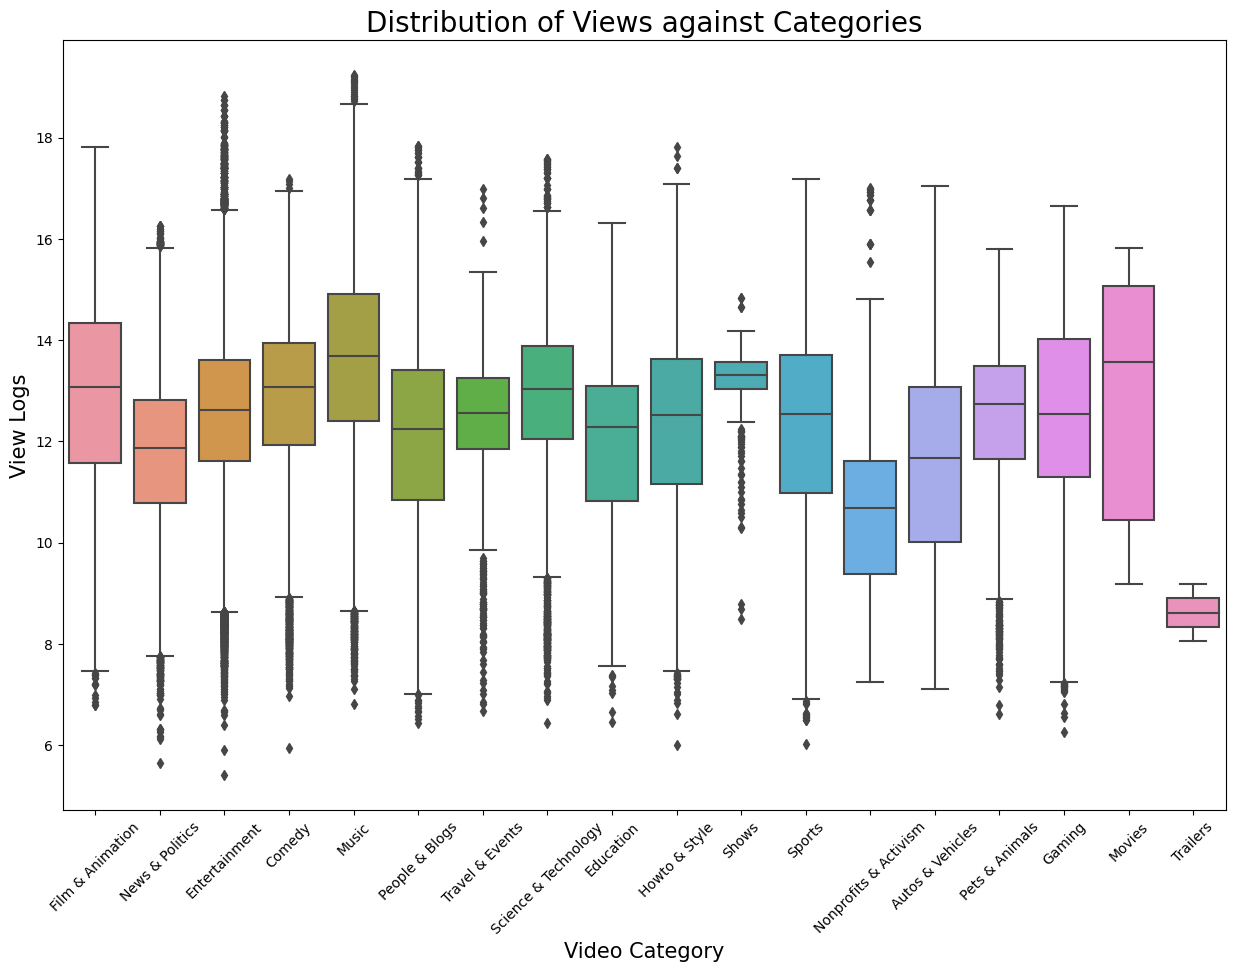

In [52]:
##2-Distribution of views against categories, using boxplot and views on log scale
fig, ax = pyplot.subplots(figsize=(15,10))
sns.boxplot(x="category", y="views_log", data=combined_data[['category','views_log']]),plt.xticks(rotation = 45)
ax.set_title("Distribution of Views against Categories",fontsize=20),ax.set_xlabel('Video Category',fontsize=15),ax.set_ylabel(ylabel='View Logs',fontsize=15)


(Text(0.5, 1.0, 'Distribution of Dislikes against Categories'),
 Text(0.5, 0, 'Video Category'),
 Text(0, 0.5, 'Dislike Logs'))

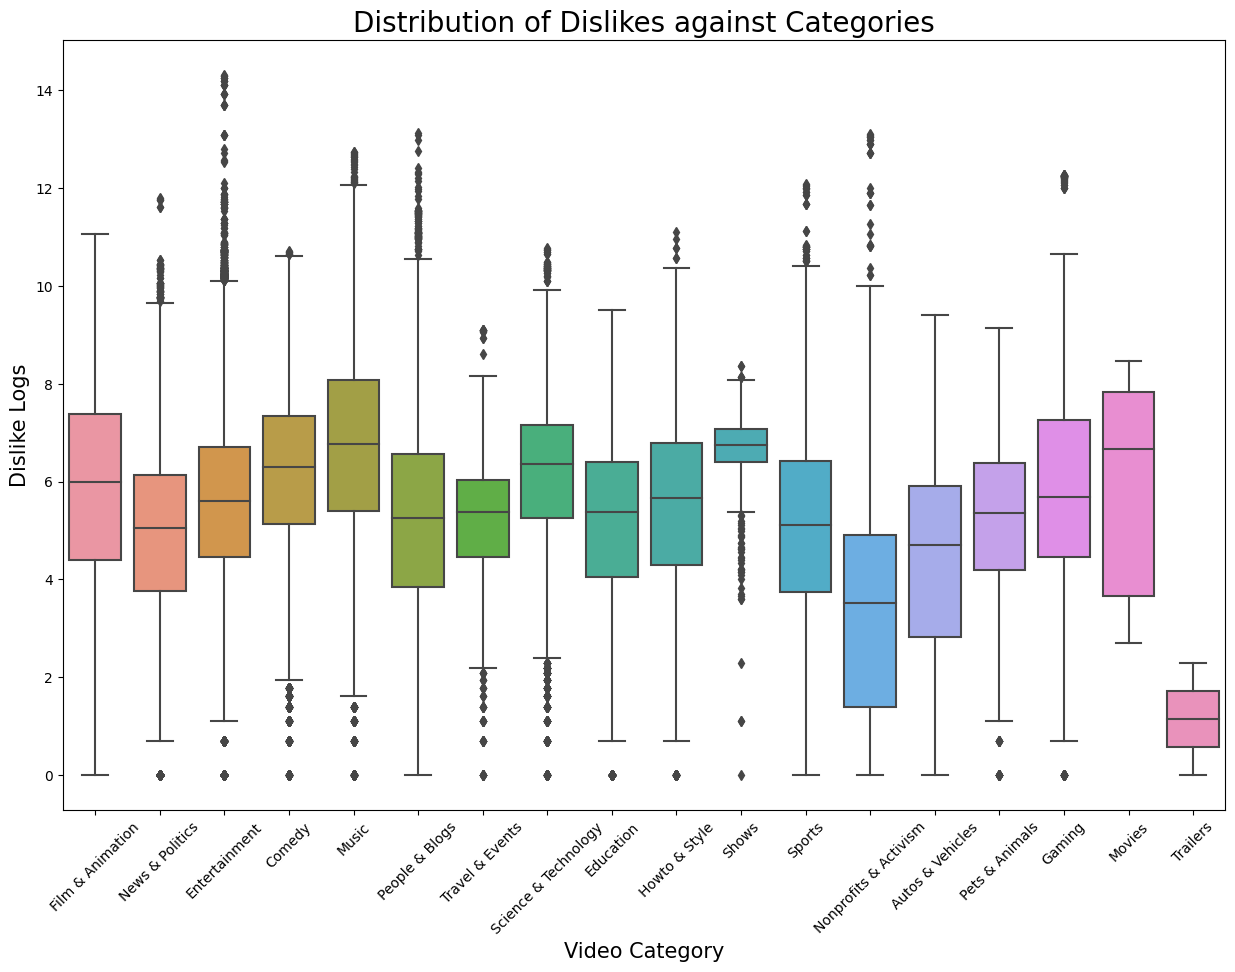

In [53]:
##3-Distribution of dislikes against categories, Using boxplot and dislikes on log scale
fig, ax = pyplot.subplots(figsize=(15,10))
sns.boxplot(x="category", y="dislikes_log", data=combined_data[['category','dislikes_log']]),plt.xticks(rotation = 45)
ax.set_title("Distribution of Dislikes against Categories",fontsize=20),ax.set_xlabel('Video Category',fontsize=15),ax.set_ylabel(ylabel='Dislike Logs',fontsize=15)


In [54]:
combined_data.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category',
       'likes_log', 'views_log', 'dislikes_log', 'comment_log'],
      dtype='object')

In [55]:
#How long does a video trend in a country?
#What are some videos which got popular because they were disliked?

**How long does a video trend in a country?**

(<Axes: title={'center': 'Number of Mean Video Trending in Each Country '}, xlabel='Country', ylabel='Mean Trinding days'>,
 Text(0.5, 1.0, 'Number of Mean Video Trending in Each Country '))

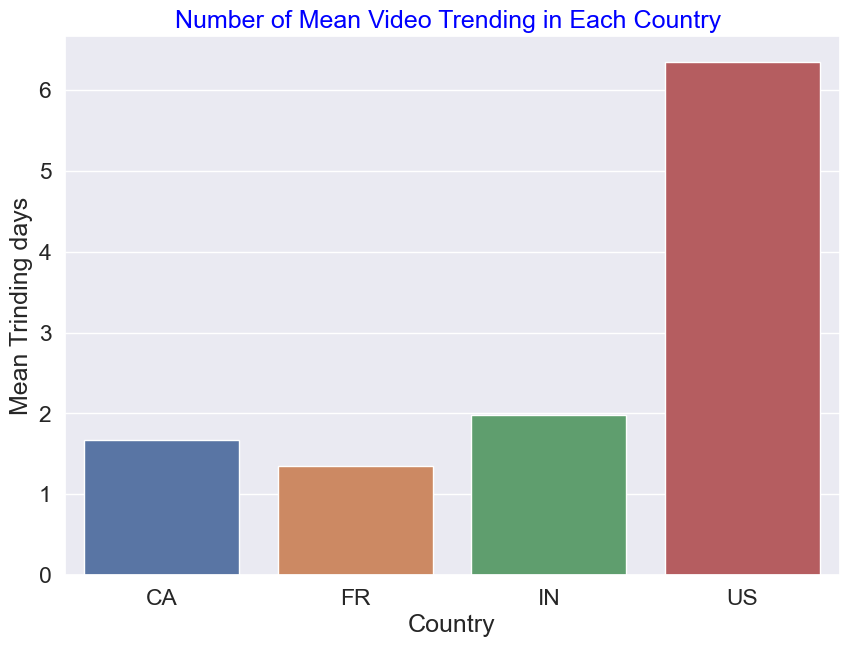

In [61]:
df=combined_data.drop_duplicates()
df1=df.groupby(['title','country']).size().reset_index(name='count')
trending=df1.groupby('country')['count'].mean().to_frame().reset_index().rename(columns={"country": "Country", "count": "Mean Trinding days"})

fig, ax = pyplot.subplots(figsize=(10, 7)),sns.set(font_scale=1.5)
sns.barplot(x="Country", y="Mean Trinding days", data=trending,ax=ax),plt.title('Number of Mean Video Trending in Each Country ',color='Blue')

**What are some videos which got popular because they were disliked?**

1.   List item
2.   List item



In [62]:
df2=df.groupby(['title','dislikes','likes']).size().reset_index(name='Trend_Days')
trending_dislikes=df2.loc[(df2['dislikes'] > df2['likes']) & (df2['Trend_Days'] >= 3)] #Videos which got trends and have dislikes more than likes#
trending_dislikes=trending_dislikes.sort_values(['Trend_Days'],ascending=[ False])
print('Videos which got popular because they were disliked: \n \n',trending_dislikes.title.to_string(index=False))

Videos which got popular because they were disliked: 
 
 Jeffrey Tambor Fired From 'Transparent' Followi...
5 Things You Missed at the 2018 SAG Awards | E!...
Fergie Performs The U.S. National Anthem / 2018...
                        Staudt on Sports I 1-22-18
         WATCH: Sen. Mitch McConnell on tax reform
                               二贵摔跤 - tienghoa.net


#### 1.2.5: Feature Engineering



##### a. Processing tags

The feature tags in the dataset has a delimiter, use that delimiter to count the number of tags, create a feature called num_tags and add that to the dataset.

In [63]:
num_tags=[]
xdf=combined_data.reset_index(drop=True)
for i in range(len(combined_data)):
  if xdf.at[i,'tags']=='[none]': #some videos has no tags but instead [none], so we are going to consider it as Zero tags.
    count=0
  else:
    count=(xdf.at[i,'tags']).count("|") + 1
  num_tags.append(count)
combined_data['num_tags']=num_tags
combined_data


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,ratings_disabled,video_error_or_removed,description,country,category,likes_log,views_log,dislikes_log,comment_log,num_tags
video_id,,,,,,,,,,,,,,,,,,,,,
kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,...,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN,Film & Animation,10.433145,13.907477,6.683361,6.783325,15
zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,...,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN,News & Politics,6.601230,13.288051,6.807935,0.000000,19
10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,...,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN,Entertainment,7.606885,13.068939,5.497168,5.010635,14
N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,...,False,False,This video showcases the difference between pe...,IN,Comedy,11.161295,14.032782,7.393263,7.895436,20
kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,...,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,IN,Entertainment,6.200509,13.047674,5.683580,4.204693,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,2018-06-14,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,22,2018-05-18 16:39:29,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259128,645888,4052,62610,...,False,False,"BTS with the PPS, the puppies. These adorable ...",US,People & Blogs,13.378383,15.926830,8.307213,11.044696,27
BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,...,False,False,The Cat Who Caught the Laser - Aaron's Animals,US,Pets & Animals,10.549569,14.337638,7.234177,7.885329,14
D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,...,False,False,I had so much fun transforming Safiyas hair in...,US,Entertainment,10.780393,13.879848,6.940222,8.292298,24


##### b. Processing description and title

Calculate the length of description and title and add them as features to the dataset

In [64]:
combined_data["desc_len"]=combined_data["description"].apply(lambda x: len(x))

In [65]:
combined_data["len_title"]=combined_data["title"].apply(lambda x: len(x))

In [66]:
# Print cell
print('check_tags_title_description \n',([combined_data['num_tags'].describe(),combined_data['desc_len'].describe(),combined_data['len_title'].describe()]))

check_tags_title_description 
 [count    154567.000000
mean         18.580551
std          11.929906
min           0.000000
25%           9.000000
50%          17.000000
75%          26.000000
max         124.000000
Name: num_tags, dtype: float64, count    154567.000000
mean        959.949426
std         857.504028
min           1.000000
25%         363.000000
50%         717.000000
75%        1288.000000
max        5260.000000
Name: desc_len, dtype: float64, count    154567.000000
mean         56.408541
std          22.976198
min           2.000000
25%          38.000000
50%          54.000000
75%          74.000000
max         100.000000
Name: len_title, dtype: float64]


##### c. Processing publish_time.


Split 'publish_time' feature into three parts time, date, and weekday, where time will contain the time component of the original feature and date and weekday will store the corresponding date and weekday number respectively. Start with 1 for Monday and end with 7 for Sunday.

In [67]:
date_data=combined_data['publish_time']

In [68]:
combined_data['publish_time'] =date_data.apply(lambda x: pd.to_datetime(x).time())
combined_data['publish_date'] =date_data.apply(lambda x: pd.to_datetime(x).date())

#day on which video was published
combined_data['publish_weekday']=date_data.apply(lambda x: x.dayofweek)+1

import random
random_index = random.randint(0,combined_data.shape[0]-1)


In [69]:
# Print cell
print('check_date_time_processing',([combined_data['publish_time'].iloc[random_index],combined_data['publish_date'].iloc[random_index],sorted(list(combined_data["publish_weekday"].value_counts()))]))

check_date_time_processing [datetime.time(12, 30, 3), datetime.date(2018, 5, 3), [18641, 18931, 22146, 22501, 22523, 23573, 26252]]


##### d. Number of videos per weekday

Calculate the number of videos published per day of the week. Which day of the week do people publish most videos? Make a visualization demonstrating the result.

In [74]:
dfx['publish_weekday'].value_counts().to_frame().reset_index()

,publish_weekday,count
0,Friday,10734
1,Thursday,9847
2,Wednesday,9575
3,Tuesday,9428
4,Monday,9359
5,Saturday,8528
6,Sunday,8372


(<Axes: title={'center': 'Number of puplished videos per week days '}, xlabel='Week_Days', ylabel='No_of_videos'>,
 Text(0.5, 1.0, 'Number of puplished videos per week days '))

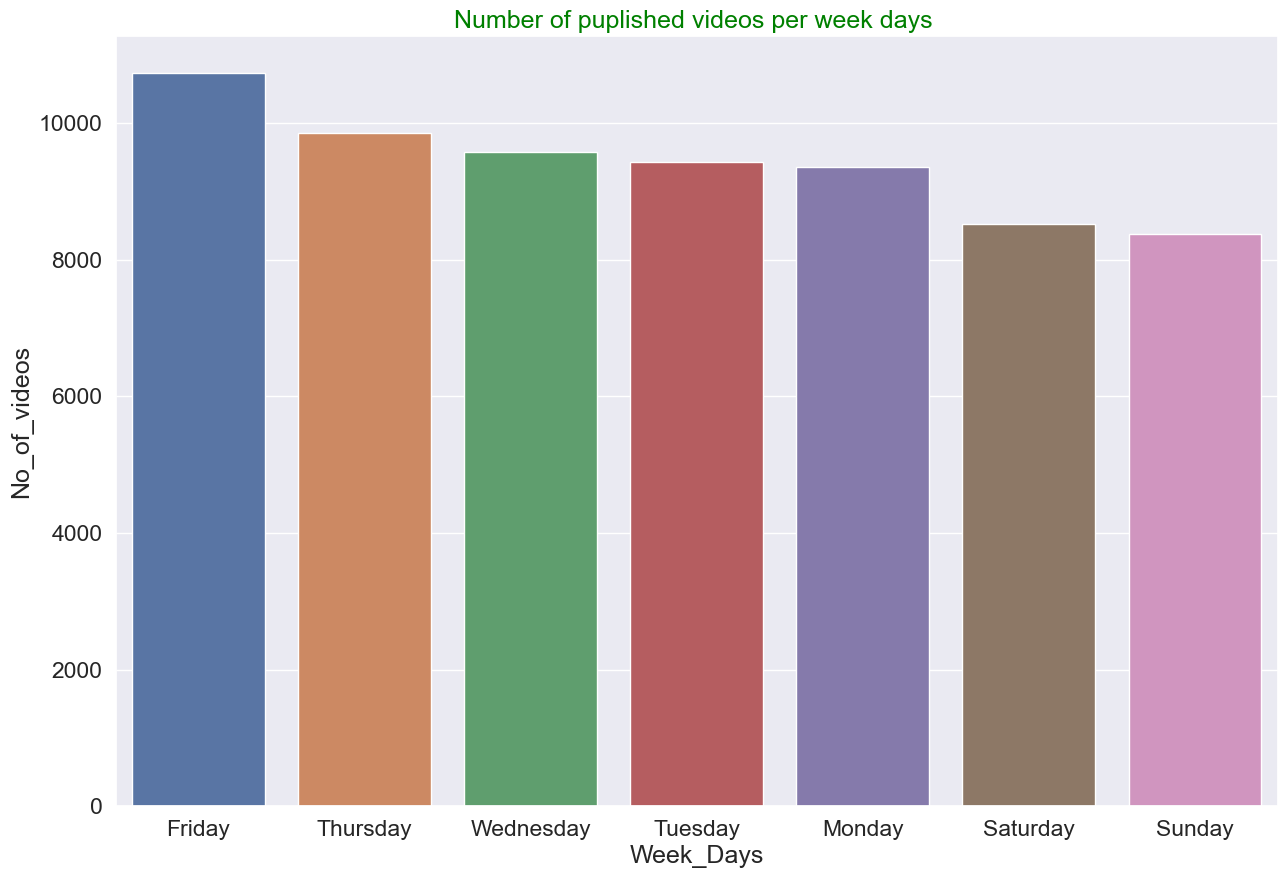

In [75]:
# plot here

##Creating dataframe after deleting videos which stay trending for more than one day according to the Video ID
dfx=combined_data.reset_index(level=0)[['video_id','publish_weekday']].drop_duplicates(subset = ['video_id'], keep = 'last')

##Mapping the day number : day name
dayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
dfx['publish_weekday'] = dfx['publish_weekday'].map(dayOfWeek)

##Calculating and plotting
videos_weekday = dfx['publish_weekday'].value_counts().to_frame().reset_index().rename(columns={"publish_weekday": "Week_Days", "count": "No_of_videos"})
fig, ax = pyplot.subplots(figsize=(15, 10)),sns.set(font_scale=1.5)
sns.barplot(x="Week_Days", y="No_of_videos", data=videos_weekday,ax=ax),plt.title('Number of puplished videos per week days ',color='Green')
# Plots will be manually graded

#### 1.2.6: Dropping irrelevant non numeric columns

Drop all the columns that are non-numeric as we have processed them and stored the information captured in them in the dataset as numbers.

Note that a few key columns are non-numeric but should be kept in the dataframe:

comments_disabled, ratings_disabled, video_error_or_removed, country

Also drop original views, like, comments and dislikes as you have processed them as logs and stored them as separate feature.

In [76]:
combined_data.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category',
       'likes_log', 'views_log', 'dislikes_log', 'comment_log', 'num_tags',
       'desc_len', 'len_title', 'publish_date', 'publish_weekday'],
      dtype='object')

In [77]:
combined_data.drop(['trending_date', 'title', 'channel_title', 'category_id',
                    'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
                    'thumbnail_link', 'description', 'publish_date'], axis = 1,inplace = True)

In [78]:
combined_data

,comments_disabled,ratings_disabled,video_error_or_removed,country,category,likes_log,views_log,dislikes_log,comment_log,num_tags,desc_len,len_title,publish_weekday
video_id,,,,,,,,,,,,,
kzwfHumJyYc,False,False,False,IN,Film & Animation,10.433145,13.907477,6.683361,6.783325,15,920,81,7
zUZ1z7FwLc8,True,False,False,IN,News & Politics,6.601230,13.288051,6.807935,0.000000,19,2232,58,1
10L1hZ9qa58,False,False,False,IN,Entertainment,7.606885,13.068939,5.497168,5.010635,14,482,58,7
N1vE8iiEg64,False,False,False,IN,Comedy,11.161295,14.032782,7.393263,7.895436,20,263,30,7
kJzGH0PVQHQ,False,False,False,IN,Entertainment,6.200509,13.047674,5.683580,4.204693,11,753,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,False,False,False,US,People & Blogs,13.378383,15.926830,8.307213,11.044696,27,926,52,5
BZt0qjTWNhw,False,False,False,US,Pets & Animals,10.549569,14.337638,7.234177,7.885329,14,46,28,5
D6Oy4LfoqsU,False,False,False,US,Entertainment,10.780393,13.879848,6.940222,8.292298,24,775,84,5


#### 1.2.7: Convert categorical features in the dataset into one hot vectors.

There are three categorical features remaining in the dataset, identify them and convert them into one hot vectors. Be sure that when you one hot encode, the original column is replaced.

In [79]:
combined_data.publish_weekday = combined_data.publish_weekday.astype('category')
combined_data.country = combined_data.country.astype('category')
combined_data.category = combined_data.category.astype('category')
combined_data= pd.get_dummies(combined_data)
# Hint: Use pd.get_dummies()range.

In [80]:
combined_data

,comments_disabled,ratings_disabled,video_error_or_removed,likes_log,views_log,dislikes_log,comment_log,num_tags,desc_len,len_title,...,category_Sports,category_Trailers,category_Travel & Events,publish_weekday_1,publish_weekday_2,publish_weekday_3,publish_weekday_4,publish_weekday_5,publish_weekday_6,publish_weekday_7
video_id,,,,,,,,,,,,,,,,,,,,,
kzwfHumJyYc,False,False,False,10.433145,13.907477,6.683361,6.783325,15,920,81,...,False,False,False,False,False,False,False,False,False,True
zUZ1z7FwLc8,True,False,False,6.601230,13.288051,6.807935,0.000000,19,2232,58,...,False,False,False,True,False,False,False,False,False,False
10L1hZ9qa58,False,False,False,7.606885,13.068939,5.497168,5.010635,14,482,58,...,False,False,False,False,False,False,False,False,False,True
N1vE8iiEg64,False,False,False,11.161295,14.032782,7.393263,7.895436,20,263,30,...,False,False,False,False,False,False,False,False,False,True
kJzGH0PVQHQ,False,False,False,6.200509,13.047674,5.683580,4.204693,11,753,88,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,False,False,False,13.378383,15.926830,8.307213,11.044696,27,926,52,...,False,False,False,False,False,False,False,True,False,False
BZt0qjTWNhw,False,False,False,10.549569,14.337638,7.234177,7.885329,14,46,28,...,False,False,False,False,False,False,False,True,False,False
D6Oy4LfoqsU,False,False,False,10.780393,13.879848,6.940222,8.292298,24,775,84,...,False,False,False,False,False,False,False,True,False,False


In [81]:
# Print cell.
print('check_final_df',(combined_data.shape))

check_final_df (154567, 39)


Let's write out the modified data we created to a file so that we can reuse it in Section 2.

In [82]:
combined_data_sec_2 = combined_data.copy()
combined_data_sec_2.rename(columns = {'views_log':'label'}, inplace = True)
combined_data_sec_2.to_csv('combined_data.csv')

#### 1.2.8: Split into x and y

Split the data into features and label, in this case the features are anything but views_log and the label is views_log.

In [83]:
combined_data.columns

Index(['comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'likes_log', 'views_log', 'dislikes_log', 'comment_log', 'num_tags',
       'desc_len', 'len_title', 'country_CA', 'country_FR', 'country_IN',
       'country_US', 'category_Autos & Vehicles', 'category_Comedy',
       'category_Education', 'category_Entertainment',
       'category_Film & Animation', 'category_Gaming',
       'category_Howto & Style', 'category_Movies', 'category_Music',
       'category_News & Politics', 'category_Nonprofits & Activism',
       'category_People & Blogs', 'category_Pets & Animals',
       'category_Science & Technology', 'category_Shows', 'category_Sports',
       'category_Trailers', 'category_Travel & Events', 'publish_weekday_1',
       'publish_weekday_2', 'publish_weekday_3', 'publish_weekday_4',
       'publish_weekday_5', 'publish_weekday_6', 'publish_weekday_7'],
      dtype='object')

In [84]:
combined_data=pd.read_csv('combined_data.csv').set_index('video_id')
label = combined_data['label']
features = combined_data.drop(['label'],axis=1)

In [85]:
combined_data

,comments_disabled,ratings_disabled,video_error_or_removed,likes_log,label,dislikes_log,comment_log,num_tags,desc_len,len_title,...,category_Sports,category_Trailers,category_Travel & Events,publish_weekday_1,publish_weekday_2,publish_weekday_3,publish_weekday_4,publish_weekday_5,publish_weekday_6,publish_weekday_7
video_id,,,,,,,,,,,,,,,,,,,,,
kzwfHumJyYc,False,False,False,10.433145,13.907477,6.683361,6.783325,15,920,81,...,False,False,False,False,False,False,False,False,False,True
zUZ1z7FwLc8,True,False,False,6.601230,13.288051,6.807935,0.000000,19,2232,58,...,False,False,False,True,False,False,False,False,False,False
10L1hZ9qa58,False,False,False,7.606885,13.068939,5.497168,5.010635,14,482,58,...,False,False,False,False,False,False,False,False,False,True
N1vE8iiEg64,False,False,False,11.161295,14.032782,7.393263,7.895436,20,263,30,...,False,False,False,False,False,False,False,False,False,True
kJzGH0PVQHQ,False,False,False,6.200509,13.047674,5.683580,4.204693,11,753,88,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,False,False,False,13.378383,15.926830,8.307213,11.044696,27,926,52,...,False,False,False,False,False,False,False,True,False,False
BZt0qjTWNhw,False,False,False,10.549569,14.337638,7.234177,7.885329,14,46,28,...,False,False,False,False,False,False,False,True,False,False
D6Oy4LfoqsU,False,False,False,10.780393,13.879848,6.940222,8.292298,24,775,84,...,False,False,False,False,False,False,False,True,False,False


In [86]:
# print cell
print('check_x_y_split',([features.shape, label.describe()]))

check_x_y_split [(154567, 38), count    154567.000000
mean         12.552680
std           1.816821
min           5.411646
25%          11.469496
50%          12.655328
75%          13.761413
max          19.232552
Name: label, dtype: float64]


## 1.3 : Machine Learning using sklearn

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

You can find the documentation [here](https://scikit-learn.org/stable/modules/classes.html)

Now we will train some machine learning models using sklearn to predict views, rather than predicting views directly we will predict views_log to avoid numerical instability issues

### 1.3.1 : Split data into train and test

Use sklearn's train_test_split library and split data into train and test sets, the split should be 80-20 meaning 80% for training and rest for testing.


In [87]:
from sklearn.model_selection import train_test_split
# code here
x_train, x_test, y_train, y_test = train_test_split(features.values, label.values, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [88]:
# print cell.
print('check_data_split',[x_train.shape,x_test.shape,y_train.shape,y_test.shape])

check_data_split [(123653, 38), (30914, 38), (123653,), (30914,)]


### 1.3.2: Train Machine Learning Models.

#### 5.3.2.1 Linear Regression

In this step we will train a linear regression model using sklearn. Train using the training data and then make predictions of test, report the mean squared error obtained on both train and test sets.

In [89]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

# Create linear regression object
lin_R = LinearRegression()

# Train the model using the training sets
lin_R.fit(x_train, y_train)

# Make predictions
y_predict_test = lin_R.predict(x_test)
y_predict_train= lin_R.predict(x_train)

# The coefficients
#print('Coefficients: \n', lin_R.coef_)

print('r Squared: %.2f' % lin_R.score(x_test, y_test))

print('mse_value of Test=',mean_squared_error(y_test, y_predict_test))
print('mse_value of Train=',mean_squared_error(y_train, y_predict_train))
mse_test= mean_squared_error(y_test, y_predict_test)

r Squared: 0.87
mse_value of Test= 0.44611703403922814
mse_value of Train= 0.4454437445118159


In [90]:
print('check_lr', (np.sqrt(mean_squared_error(y_test, y_predict_test))))

check_lr 0.6679199308594018


#### 1.3.2.2  Dimensionality reduction with PCA



##### Step 1: Fitting PCA and explained_variance_ratiio
Use Principal component analysis to reduce number of dimensions of the dataset, as a first step fit a pca model on your train set and then plot the explained_variance_ratio against the number of components to decide the number of components you should keep.

[(0, 0.09115519280826223), (1, 0.1395831892624945), (2, 0.17827771788686317), (3, 0.21660452532355265), (4, 0.25070003718148537), (5, 0.2841311945831427), (6, 0.3169550040134653), (7, 0.3484584471561563), (8, 0.3796155283820929), (9, 0.41060513322351433), (10, 0.4411685574636884), (11, 0.47101781671344345), (12, 0.5005390043481855), (13, 0.5293549532522596), (14, 0.5577740247266944), (15, 0.5857778381496195), (16, 0.6132548974589956), (17, 0.6402641211091185), (18, 0.667078043950907), (19, 0.69371539469549), (20, 0.7201882183468491), (21, 0.74651878955196), (22, 0.7728352495925688), (23, 0.7990089702536483), (24, 0.8247501503676986), (25, 0.850300609999995), (26, 0.8752632491440172), (27, 0.8998882203210121), (28, 0.9225058175039651), (29, 0.9429891915042978), (30, 0.9621286810012469), (31, 0.9794212796033676), (32, 0.9948917602425862), (33, 0.9982954701179628), (34, 1.0), (35, 1.0), (36, 1.0), (37, 1.0)]


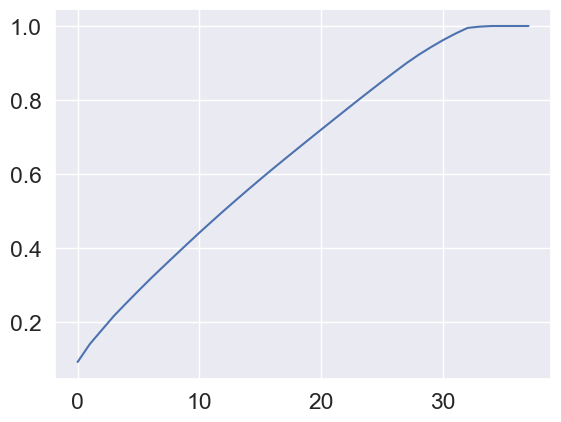

In [93]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# code here

pca = PCA()
sc = StandardScaler()
x_train_std=pca.fit_transform(x_train)
np.set_printoptions(suppress=True)
var_vs_pca = np.cumsum(pca.explained_variance_ratio_)
print([(i,x) for i, x in enumerate(var_vs_pca)])
# plotting the explained_variance_ratio against the number of components
plt.plot(var_vs_pca)

[(0, 0.09124263864944814), (1, 0.13954477766594411), (2, 0.17819566443638227), (3, 0.21658610575008092), (4, 0.25065773210671516), (5, 0.28415451365975036), (6, 0.31693716976465347), (7, 0.34835414338010995), (8, 0.37947960763924216), (9, 0.410494982223028), (10, 0.4409726437007013), (11, 0.4709042780131346), (12, 0.5004840934022717), (13, 0.5292132536896397), (14, 0.5576509151064952), (15, 0.5857344753161304), (16, 0.6132200843141158), (17, 0.6402508166377029), (18, 0.6670933801662423), (19, 0.6937392805230223), (20, 0.7201943879367781), (21, 0.7465235954441357), (22, 0.7728356903025099), (23, 0.7989962319308115), (24, 0.8247303166988613), (25, 0.8502469264682969), (26, 0.8752150870912311), (27, 0.8999338263191092), (28, 0.9225015105497258), (29, 0.9430160776318501), (30, 0.9621759593940035), (31, 0.9794361156519712), (32, 0.9948944433403061), (33, 0.9982971891519661)]


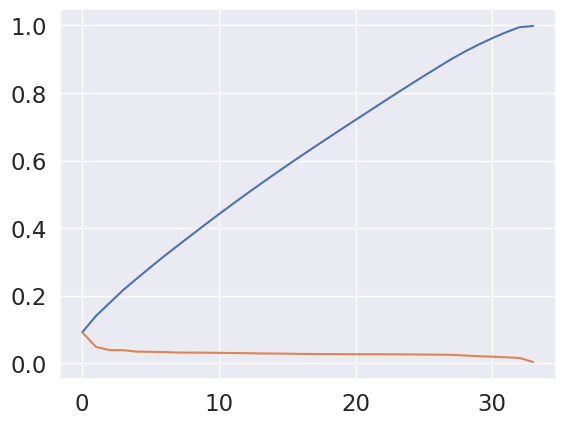

In [57]:
#It is strating faltten with number of component = 34 (99% of variance)
pca = PCA(34)
x_train_std=pca.fit_transform(x_train)
np.set_printoptions(suppress=True)
var_vs_pca = np.cumsum(pca.explained_variance_ratio_)
print([(i,x) for i, x in enumerate(var_vs_pca)])
# plotting the explained_variance_ratio against the number of components
plt.plot(var_vs_pca)
plt.plot(pd.Series(pca.explained_variance_ratio_))

##### Step 2: Deciding number of components to keep
Use the plot to decide the number of components to keep, choose a number that explains atleast 95% of variance in the dataset. Then fit and transform your pca on training set using the number of components you decided.

**Remember that your pca should be trained on the training set (and transformed here) but only transformed on the test set.**

In [94]:
# code here
pca = PCA(n_components=34)
x_train_Trans=pca.fit_transform(x_train)
x_test_Trans=pca.transform(x_test)

In [95]:
# Print cell.
print('check_pca', (x_train_Trans[:50,:]))

check_pca [[ 1.30957174 -1.49160918  1.27755133 ...  0.8880177  -0.5174053
   0.35804414]
 [ 1.57292642 -1.34215966 -0.74480146 ... -0.24467492  0.73412419
  -0.77592337]
 [ 1.47923611 -2.07921416  0.4958444  ...  0.20974823  0.155579
  -0.25534992]
 ...
 [-0.47229094  1.06549725 -0.90243102 ...  1.62480956  1.1262418
  -0.17709165]
 [ 1.34259387 -0.56208244 -0.67964645 ... -0.02482437 -0.91392081
   0.66588963]
 [ 1.1132019   0.1754874  -0.90656239 ...  0.35778915 -0.36258812
  -0.00645859]]


### 1.3.2.3 Random Forest.



##### Step 1: Hyperparameter tuning.
Use grid search and train a random forest model on the transformed train dataset. Take a look at the sklearn `RandomForestRegressor` documentation and tune the max_depth hyperparameter using grid search. We have already tested the number of estimators hyperparameter for you. Note this section may take a while to run depending on how large your grid is.

(Hint: refer to the GridSearchCV documentation and do some reading on how the max_depth in a RF model affects the result - while theory may help guide a rough estimate of possible hyperparameters, we can cross validate values using tools like GridSearch.

Our autograder has tiered points for this question depending on your final MSE value but is fairly generous; we are not requiring that you find the **most** optimal value for this hyperparameter but rather demonstrate understanding of grid search optimization.


In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Only tune the max depth of the trees in the RF hyperparameter.
random_grid = GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1), 
                           param_grid={'n_estimators':[140],
                                       'max_depth':[25,30,35,40,45]},
                           cv=5, n_jobs = -1)
random_grid.fit(x_train_Trans, y_train)

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

KeyboardInterrupt: 

In [ ]:
random_grid.best_params_

##### Step 2: Fitting RF
Fit the random forest on the training data using the parameters you computed above. Then make predictions on the test set, report the root mean squared error for the test set.

In [ ]:
!pip3 install joblib

In [ ]:
import joblib

joblib.dump(random_grid.best_params_, 'grid_search_best_params.joblib')


In [ ]:
sys

In [ ]:
# Set n_estimators = 140
reg_RF = RandomForestRegressor(n_estimators=140, max_depth=40)
reg_RF.fit(x_train_Trans, y_train)
y_pred_RF = reg_RF.predict(x_test_Trans)

In [ ]:
# Print cell
print('check_rf', (np.sqrt(mean_squared_error(y_test, y_pred_RF))))

## __<span style="color:red; font-weight:bold">Implementing voting regressor: </span><br>__

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, BaggingRegressor
from sklearn.model_selection import cross_val_score


# Create base regressors
lr = LinearRegression()
dec_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()


# Voting Regressor
voting_regressor = VotingRegressor(estimators=[
                                                ('linear', lr),
                                                ('tree', dec_tree),
                                                ('forest', random_forest)
                                            ])

# Bagging Regressor
bagging_regressor = BaggingRegressor(base_estimator=random_forest, n_estimators=5, random_state=42)

# Cross-validation
cv_score_voting = cross_val_score(voting_regressor, x_train_Trans, y_train, cv=5, scoring='neg_mean_squared_error')
cv_score_bagging = cross_val_score(bagging_regressor, x_train_Trans, y_train, cv=5, scoring='neg_mean_squared_error')


In [ ]:
from sklearn.ensemble import

lr = LinearRegression()
dec_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()


# Voting Regressor
voting_regressor = VotingRegressor(estimators=[
                                                ('linear', lr),
                                                ('tree', dec_tree),
                                                ('forest', random_forest)
                                            ])

# Bagging Regressor
bagging_regressor = BaggingRegressor(base_estimator=random_forest, n_estimators=5, random_state=42)



## Almost halfway there :)

Well done! Almost halfway there :)



# Submission

**Submission on the blackboard**.
** PDF submission for the simalarity check and .ipynb for original submission **

Go to the "File" tab at the top left, and click "Download .ipynb". Submit under 'scalableMachinelearning.ipynb'.

You must submit your notebook to blackboard for the grading.

In [ ]:
#TO PDF
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Yourname_UID.ipynb')